<a href="https://colab.research.google.com/github/rechavar/pyCovid_TechLabsProj/blob/Marco/TechLabs__finalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Now it's time for the predictions. The R-value I will use for that (the one that we want to be able to change with a slider) will unlike in the dataframe before not be one that is taken from a whole week but only from the past four days. The R_7 was used to reduce noise in the data, now we chose the R-value by ourselves, so there is no noise. First I will make a prediction for Germany for the next four weeks:

# TechLabs final project(problem 2 - group 8)

This Notebook is to work in the final project for Techlabs code-at-home course.
Members: Luca Wulfert, Laura Laks, Phillip Guske, Juliana Bedoya and Alejandro Echavarria

### libraries

In [0]:
import pandas as pd

### Constants

In [0]:
confirmed_csv_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
death_csv_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
recovered_csv_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'

### Usefull databases

this is the DB that appear in kaggle.

In [0]:
data_confirmed = pd.read_csv(confirmed_csv_url)
data_death = pd.read_csv(death_csv_url)
data_recovered = pd.read_csv(recovered_csv_url)

### Code for all data cleaning

In [0]:
# Dropping all the innecesary columns
data_confirmed = data_confirmed.drop(['Province/State', 'Lat', 'Long'], axis = 1)
data_death = data_death.drop(['Province/State', 'Lat', 'Long'], axis = 1)
data_recovered = data_recovered.drop(['Province/State', 'Lat', 'Long'], axis = 1)

# Set New index
data_confirmed = data_confirmed.set_index('Country/Region')
data_death = data_death.set_index('Country/Region')
data_recovered = data_recovered.set_index('Country/Region')

# Groupping duplicated columns
data_confirmed = data_confirmed.groupby(by = data_confirmed.index, axis = 0).sum()
data_death = data_death.groupby(by= data_death.index, axis = 0 ).sum()
data_recovered = data_recovered.groupby(by= data_recovered.index, axis = 0).sum()

# add a total row
data_confirmed.loc['Global'] = data_confirmed.sum(axis=0)
data_death.loc['Global'] = data_death.sum(axis=0)
data_recovered.loc['Global'] = data_recovered.sum(axis=0)

In [5]:
data_confirmed

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,...,840,906,933,996,1026,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171,2335,2469,2704,2894,3224,3392,3563,3778,4033,4402,4687,4963,5226,5639,6053,6402,6664,7072,7653,8145,8676,9216,9998,10582,11173
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,518,539,548,562,584,609,634,663,678,712,726,736,750,766,773,782,789,795,803,820,832,842,850,856,868,872,876,880,898,916,933,946,948,949,964,969,981,989,998,1004
Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...,2268,2418,2534,2629,2718,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006,4154,4295,4474,4648,4838,4997,5182,5369,5558,5723,5891,6067,6253,6442,6629,6821,7019,7201,7377,7542,7728,7918,8113,8306,8503
Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,673,696,704,713,717,717,723,723,731,738,738,743,743,743,745,745,747,748,750,751,751,752,752,754,755,755,758,760,761,761,761,761,761,761,762,762,762,762,762,763
Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,19,19,24,24,24,24,25,25,25,25,26,27,27,27,27,30,35,35,35,36,36,36,43,43,45,45,45,45,48,48,48,48,50,52,52,58,60,61,69,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Western Sahara,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,9,9
Yemen,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1,1,1,1,6,6,7,10,10,12,22,25,25,34,34,51,56,65,70,85,106,122,128,130,167,184,197,209,212,222,233
Zambia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,48,52,57,61,65,70,74,76,84,84,88,88,95,97,106,109,119,124,137,138,146,153,167,252,267,267,441,446,654,654,679,753,761,772,832,866,920,920,920,920


In [6]:
data_confirmed.loc['Zambia']

1/22/20      0
1/23/20      0
1/24/20      0
1/25/20      0
1/26/20      0
          ... 
5/21/20    866
5/22/20    920
5/23/20    920
5/24/20    920
5/25/20    920
Name: Zambia, Length: 125, dtype: int64

Transposing the Dataframe so we now have Date as index and country as columns;
Changing the type of the index column to datetime:

In [0]:
data_confirmed=data_confirmed.T
data_confirmed.rename_axis(index='Date', columns="Country",inplace=True)

###has to be changed to this in master branch, otherwise does not change to datetime index
data_confirmed.index=pd.to_datetime(data_confirmed.index)

In [8]:
data_confirmed.index

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31',
               ...
               '2020-05-16', '2020-05-17', '2020-05-18', '2020-05-19',
               '2020-05-20', '2020-05-21', '2020-05-22', '2020-05-23',
               '2020-05-24', '2020-05-25'],
              dtype='datetime64[ns]', name='Date', length=125, freq=None)

In [9]:
data_confirmed.columns

Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria',
       ...
       'Uruguay', 'Uzbekistan', 'Venezuela', 'Vietnam', 'West Bank and Gaza',
       'Western Sahara', 'Yemen', 'Zambia', 'Zimbabwe', 'Global'],
      dtype='object', name='Country', length=189)

Test: Slicing the dataframe to only have the data for Germany:

In [10]:
germany_confirmed=data_confirmed.loc[:,["Germany"]]
germany_confirmed["Total Cases"]=germany_confirmed["Germany"]
germany_confirmed.drop("Germany",inplace=True, axis=1)
germany_confirmed.rename_axis(columns="Germany",inplace=True)
germany_confirmed.index

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31',
               ...
               '2020-05-16', '2020-05-17', '2020-05-18', '2020-05-19',
               '2020-05-20', '2020-05-21', '2020-05-22', '2020-05-23',
               '2020-05-24', '2020-05-25'],
              dtype='datetime64[ns]', name='Date', length=125, freq=None)

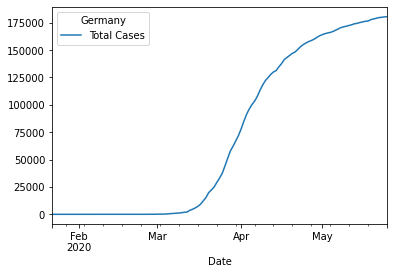

In [11]:
germany_confirmed.plot()

Calculating the R-value for any given day: I'm using the method the Robert-Koch-Institute uses - It is done by dividing the sum of new cases from the last seven days by the sum of new cases four days before that. 
I will be calling this value R_7
Four days is the generational interval, which is the time it takes on average for one infection to be transmitted to the next generation (because one isn't infectious right away). 
The seven days is used to smoothen the curve by reducing noise, so that the R-value does not change so much from day to day. 

First: New Column with new cases compared to previous day:

In [0]:
germany_confirmed["New Cases"]=germany_confirmed["Total Cases"]-germany_confirmed.shift(1)["Total Cases"]

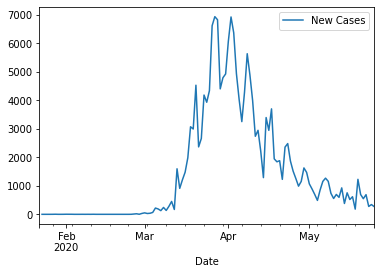

In [13]:
germany_confirmed.plot(y="New Cases")

Now: Create new column with calculated R_7 values



In [0]:
germany_confirmed["R_7"]=(germany_confirmed["Total Cases"]-germany_confirmed.shift(7)["Total Cases"])/(germany_confirmed.shift(4)["Total Cases"]-germany_confirmed.shift(11)["Total Cases"])

In [15]:
germany_confirmed.tail()

Germany,Total Cases,New Cases,R_7
Date,,,
2020-05-21,179021,548.0,1.011804
2020-05-22,179710,689.0,1.126289
2020-05-23,179986,276.0,0.919036
2020-05-24,180328,342.0,0.904914
2020-05-25,180600,272.0,0.891261


Comment for the R_value-calculation: Especially for the beginning this throws unrealistically high values, because consecutive days where no new cases are detected, so if one new case is detected one day, it sometimes even returns infinitely high R-values. See plot for visualisation:

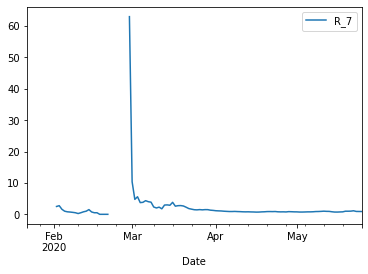

In [16]:
germany_confirmed.plot(y="R_7")

Let's try to plot the same only for values from mid-March onwards (note that the times when the R-values become realistic or even start becoming unrealistic again are different for different countries, something we have to keep in mind for our interactive maps):

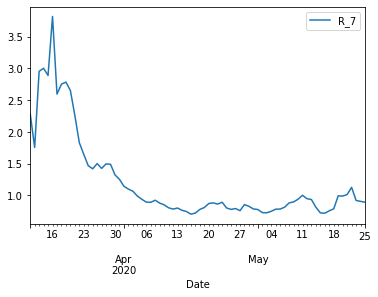

In [17]:
germany_confirmed["3/11/20":].plot(y="R_7")

This is the full code that I used to create the germany_confirmed dataframe:

In [0]:
germany_confirmed=data_confirmed.loc[:,["Germany"]]
germany_confirmed["Total Cases"]=germany_confirmed["Germany"]
germany_confirmed.drop("Germany",inplace=True, axis=1)
germany_confirmed.rename_axis(columns="Germany",inplace=True)

germany_confirmed["New Cases"]=germany_confirmed["Total Cases"]-germany_confirmed.shift(1)["Total Cases"]

germany_confirmed["R_7"]=(germany_confirmed["Total Cases"]-germany_confirmed.shift(7)["Total Cases"])/(germany_confirmed.shift(4)["Total Cases"]-germany_confirmed.shift(11)["Total Cases"])

Now create a function that can create the same dataframe for any country we want:

In [0]:
def create_country(country):
  country_confirmed=data_confirmed.loc[:,[country]]
  country_confirmed["Total Cases"]=country_confirmed[country]
  country_confirmed.drop(country, inplace=True, axis=1)
  country_confirmed.rename_axis(columns=country,inplace=True)
  country_confirmed["New Cases"]=country_confirmed["Total Cases"]-country_confirmed.shift(1)["Total Cases"]
  country_confirmed["R_7"]=(country_confirmed["Total Cases"]-country_confirmed.shift(7)["Total Cases"])/(country_confirmed.shift(4)["Total Cases"]-country_confirmed.shift(11)["Total Cases"])

  return(country_confirmed)

In [20]:
create_country("Argentina").info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 125 entries, 2020-01-22 to 2020-05-25
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Total Cases  125 non-null    int64  
 1   New Cases    124 non-null    float64
 2   R_7          84 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 8.9 KB


I now create a dictionary with all the dataframes for every country

In [0]:
country_dataframes = {country: create_country(country) for country in data_confirmed.columns}

In [22]:
country_dataframes['Germany'].tail(20)

Germany,Total Cases,New Cases,R_7
Date,,,
2020-05-06,168162,1155.0,0.783416
2020-05-07,169430,1268.0,0.813403
2020-05-08,170588,1158.0,0.880579
2020-05-09,171324,736.0,0.895983
2020-05-10,171879,555.0,0.938396
2020-05-11,172576,697.0,1.000467
2020-05-12,173171,595.0,0.946706
2020-05-13,174098,927.0,0.933774
2020-05-14,174478,380.0,0.812228


This all works. Once again - the full code to create this dictionary is as follows:

In [0]:
germany_confirmed=data_confirmed.loc[:,["Germany"]]
germany_confirmed["Total Cases"]=germany_confirmed["Germany"]
germany_confirmed.drop("Germany",inplace=True, axis=1)
germany_confirmed.rename_axis(columns="Germany",inplace=True)

germany_confirmed["New Cases"]=germany_confirmed["Total Cases"]-germany_confirmed.shift(1)["Total Cases"]

germany_confirmed["R_7"]=((germany_confirmed["Total Cases"]-germany_confirmed.shift(7)["Total Cases"])/
                          (germany_confirmed.shift(4)["Total Cases"]-germany_confirmed.shift(11)["Total Cases"]))

def create_country(country):
  country_confirmed=data_confirmed.loc[:,[country]]
  country_confirmed["Total Cases"]=country_confirmed[country]
  country_confirmed.drop(country, inplace=True, axis=1)
  country_confirmed.rename_axis(columns=country,inplace=True)
  country_confirmed["New Cases"]=(country_confirmed["Total Cases"]-country_confirmed.shift(1)["Total Cases"])
  country_confirmed["R_7"]=(country_confirmed["Total Cases"]-country_confirmed.shift(7)["Total Cases"])/(country_confirmed.shift(4)["Total Cases"]-country_confirmed.shift(11)["Total Cases"])
  return(country_confirmed)

country_dataframes = {country: create_country(country) for country in data_confirmed.columns}

In [24]:
country_dataframes["Argentina"].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 125 entries, 2020-01-22 to 2020-05-25
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Total Cases  125 non-null    int64  
 1   New Cases    124 non-null    float64
 2   R_7          84 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 8.9 KB


Now it's time to make some projections. Note that the R-value we will use and that will be changeable by a slider is different from the R_7 I calculated for the past data. The R_7 had the purpose to reduce noise in the data we had from the past. The R-value for the projection is a value we chose and create new data with, so there is no noise. 

By default, I chose the R_slidervalue to be the same as the last of the calculated R_7

In [25]:
from datetime import timedelta
germany_prediction=(pd.DataFrame(index=pd.date_range(start=country_dataframes["Germany"].index[-1], periods=14, freq='D'), 
                                 columns=["Total Cases", "New Cases", "R_7"]))
germany_prediction.drop(germany_prediction.index[0], inplace=True)
germany_prediction.rename_axis(index='Date', columns="Germany",inplace=True)
germany_prediction.index=pd.to_datetime(germany_prediction.index)
country_dataframes['Germany']["Prediction"]=False
germany_prediction["Prediction"]=True

germany_combined=pd.concat([country_dataframes['Germany'], germany_prediction])

R_slidervalue_germany=country_dataframes["Germany"]["R_7"][-1]

for date in germany_combined.index:
  if germany_combined.loc[date, 'Prediction']:
    germany_combined.loc[date, 'Total Cases']=R_slidervalue_germany*(germany_combined.shift(4).loc[date, 'Total Cases']-germany_combined.shift(5).loc[date, 'Total Cases'])+germany_combined.shift(1).loc[date, 'Total Cases']

germany_combined['New Cases']=germany_combined['Total Cases']-germany_combined.shift(1)['Total Cases']
for date in germany_combined.index:
  try:
    germany_combined.loc[date, "R_7"]=(germany_combined.loc[date, "Total Cases"]-germany_combined.shift(7).loc[date, "Total Cases"])/(germany_combined.shift(4).loc[date, "Total Cases"]-germany_combined.shift(11).loc[date, "Total Cases"])
  except ZeroDivisionError:
    germany_combined.loc[date, 'R_7']='inf'
germany_combined["Total Cases"]=germany_combined["Total Cases"].astype('int64')
germany_combined["New Cases"]=germany_combined["New Cases"].astype('float64')
germany_combined["R_7"]=germany_combined["R_7"].astype('float64')

germany_combined.tail(20)



Germany,Total Cases,New Cases,R_7,Prediction
Date,,,,
2020-05-19,177778,1227.000000,0.991819,False
2020-05-20,178473,695.000000,0.988031,False
2020-05-21,179021,548.000000,1.011804,False
2020-05-22,179710,689.000000,1.126289,False
2020-05-23,179986,276.000000,0.919036,False
2020-05-24,180328,342.000000,0.904914,False
2020-05-25,180600,272.000000,0.891261,False
2020-05-26,181214,614.079023,0.767496,True
2020-05-27,181460,245.988114,0.705495,True


The next step is to make a function that does what we just did for Germany for all the countries: 

In [29]:
from datetime import timedelta

def create_projection(country):

  country_prediction=(pd.DataFrame(index=pd.date_range(start=country_dataframes[country].index[-1], periods=14, freq='D'), 
                                   columns=["Total Cases", "New Cases", "R_7"]))
  country_prediction.drop(country_prediction.index[0], inplace=True)
  country_prediction.rename_axis(index='Date', columns=country,inplace=True)
  country_prediction.index=pd.to_datetime(country_prediction.index)
  country_dataframes[country]["Prediction"]=False
  country_prediction["Prediction"]=True

  country_combined=pd.concat([country_dataframes[country], country_prediction])

  R_slidervalue_country=country_dataframes[country]["R_7"][-1]

  for date in country_combined.index:
    if country_combined.loc[date, 'Prediction']:
      country_combined.loc[date, 'Total Cases']=R_slidervalue_country*(country_combined.shift(4).loc[date, 'Total Cases']-country_combined.shift(5).loc[date, 'Total Cases'])+country_combined.shift(1).loc[date, 'Total Cases']

  country_combined['New Cases']=country_combined['Total Cases']-country_combined.shift(1)['Total Cases']
  for date in country_combined.index:
    try:
      country_combined.loc[date, "R_7"]=(country_combined.loc[date, "Total Cases"]-country_combined.shift(7).loc[date, "Total Cases"])/(country_combined.shift(4).loc[date, "Total Cases"]-country_combined.shift(11).loc[date, "Total Cases"])
    except ZeroDivisionError:
      country_combined.loc[date, 'R_7']=None
  country_combined["Total Cases"]=country_combined["Total Cases"].astype('float64')
  country_combined["New Cases"]=country_combined["New Cases"].astype('float64')
  country_combined["R_7"]=country_combined["R_7"].astype('float64')
  return (country_combined)  
projection_dataframes = {country: create_projection(country) for country in data_confirmed.columns}


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars


In [45]:
projection_dataframes['Germany'].loc[projection_dataframes['Germany']['Prediction']]

Germany,Total Cases,New Cases,R_7,Prediction
Date,,,,
2020-05-26,181214.079023,614.079023,0.767496,True
2020-05-27,181460.067136,245.988114,0.705495,True
2020-05-28,181764.878494,304.811358,0.693074,True
2020-05-29,182007.301563,242.423068,0.567375,True
2020-05-30,182554.606419,547.304856,0.747540,True
2020-05-31,182773.846101,219.239681,0.818812,True
2020-06-01,183045.512662,271.666562,0.891261,True
2020-06-02,183261.574957,216.062295,0.891261,True
2020-06-03,183749.366584,487.791627,0.891261,True


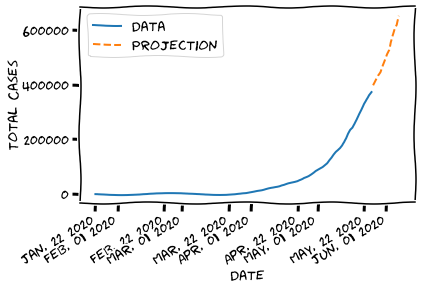

In [66]:
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates
plt.xkcd()
fig, ax = plt.subplots()

country='Brazil'
variable='Total Cases'

ax.plot_date(projection_dataframes[country].loc[projection_dataframes[country]['Prediction']==False]
             .index, projection_dataframes[country].loc[projection_dataframes[country]['Prediction']==False][variable], label="Data", linestyle='solid', marker=None)
ax.plot_date(projection_dataframes[country].loc[projection_dataframes[country]['Prediction']==True]
             .index, projection_dataframes[country].loc[projection_dataframes[country]['Prediction']==True][variable], label="Projection", linestyle='--', marker=None)
date_format=mpl_dates.DateFormatter('%b, %d %Y')
ax.xaxis.set_major_formatter(date_format)
ax.set_xlabel('Date')
ax.set_ylabel('Total Cases')
#ax.title('Brazil (Total Cases)')
ax.legend()
fig.autofmt_xdate()

plt.show()